<center><h1>Heart Disease Prediction</h1></center>

# Problem Statement
Heart disease is easier to treat when it is detected in the early stages. Machine learning techniques may aid a more efficient analysis in the prediction of the disease. Moreover, this prediction is one of the most central problems in medical, as it is one of the leading disease related to unhealthy lifestyle. So, an early prediction of this disease will be useful for a cure or averion. In this study, we experiment with the heart disease dataset to explore the machine learning algorithms and build an optimum model to predict the disease.

# Data Definition
Each attribute is a medical risk factor.

age: Age of the patient - (Numerical)

gender: Gender of the patient - (0,1) - (Male, Female) - (Categorical)

chest_pain: It refers to the chest pain experienced by the patient -(0,1,2,3) - (Categorical)

rest_bps: Blood pressure of the patient while resting(in mm/Hg) - (Numerical)

cholestrol: Patient's cholestrol level (in mg/dl) - (Numerical)

fasting_blood_sugar: Blood sugar of the patient while fasting - (>120mg/: = 1, otherwise = 0) - (Categorical)

rest_ecg: Potassium level (0,1,2) - (Categorical)

thalach: The patients maximum heart rate - (Numerical)

exer_angina: It refers to the exercise induced angina - (1=Yes, 0=No) - (Categorical)

old_peak: It is the ST depression induced by exercise relative to rest(ST relates to the position on ECG plots) (Numerical)

slope: It refers to the slope of the peak of the exercise ST Segment- (0,1,2) - (Categorical)

ca: Number of major vessels - (0,1,2,3,4) - (Categorical)

thalassemia: It refers to thalassemia which is a blood disorder - (0,1,2,3) - (Categorical)

target: Patient has heart disease or not - (1=Yes, 0=No) - (Target variable)

# Table of Content
Import Libraries

Set Options

Read Data

Data Analysis and Preparation
4.1 - Understand the Dataset
4.1.1 - Data Type
4.1.2 - Summary Statistics
4.1.3 - Distribution of Variables
4.1.4 - Correlation
4.1.5 - Discover Outliers
4.1.6 - Missing Values
4.2 - Prepare the Data

Decision Tree

5.1 - Decision Tree
5.2 - Prune a Decision Tree
5.3 - Decision Tree (using GridSearchCV)

Conclusion and Interpretation

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap 
import seaborn as sns
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.tree import export_graphviz

import statsmodels
import statsmodels.api as sm

# import functions to plot the decision tree
import pydotplus
from IPython.display import Image  
import graphviz

In [2]:
plt.rcParams["figure.figsize"] = [15,8]

# Set options

In [3]:
pd.options.display.max_rows = None
pd.options.display.max_columns = None
np.set_printoptions(suppress = True)

In [4]:
import os
os.chdir(r"D:\Imarticus\ML\Supervised learning\4-Decision Tree")

# Read Data

In [5]:
df_heart =  pd.read_csv("HeartDisease.csv")
df_heart.sample(5)

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
20,59,1,0,135,234,0,1,161,0,0.5,1,0,3,1
185,44,1,0,112,290,0,0,153,0,0.0,2,1,2,0
46,44,1,2,140,235,0,0,180,0,0.0,2,0,2,1
81,45,1,1,128,308,0,0,170,0,0.0,2,0,2,1


In [6]:
df_heart.shape

(303, 14)

# Data Analysis and Preparation
Data preparation is the process of cleaning and transforming raw data before building predictive models.

Here, we analyze and prepare data to perform classification techniques:
1. Check data types. Ensure your data types are correct. Refer data definitions to validate
2. If data types are not as per business definition, change the data types as per requirement
3. Study summary statistics
4. Distribution of variables
5. Study correlation
6. Detect outliers
7. Check for missing values

Note: It is an art to explore data, and one needs more and more practice to gain expertise in this area

In [7]:
df_heart.dtypes

age                      int64
gender                   int64
chest_pain               int64
rest_bps                 int64
cholestrol               int64
fasting_blood_sugar      int64
rest_ecg                 int64
thalach                  int64
exer_angina              int64
old_peak               float64
slope                    int64
ca                       int64
thalassemia              int64
target                   int64
dtype: object

In [8]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  303 non-null    int64  
 1   gender               303 non-null    int64  
 2   chest_pain           303 non-null    int64  
 3   rest_bps             303 non-null    int64  
 4   cholestrol           303 non-null    int64  
 5   fasting_blood_sugar  303 non-null    int64  
 6   rest_ecg             303 non-null    int64  
 7   thalach              303 non-null    int64  
 8   exer_angina          303 non-null    int64  
 9   old_peak             303 non-null    float64
 10  slope                303 non-null    int64  
 11  ca                   303 non-null    int64  
 12  thalassemia          303 non-null    int64  
 13  target               303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
for i in ["gender","chest_pain","fasting_blood_sugar","rest_ecg","exer_angina","slope","ca","thalassemia"]:
    df_heart[i] = df_heart[i].astype(object)

In [10]:
df_heart.dtypes

age                      int64
gender                  object
chest_pain              object
rest_bps                 int64
cholestrol               int64
fasting_blood_sugar     object
rest_ecg                object
thalach                  int64
exer_angina             object
old_peak               float64
slope                   object
ca                      object
thalassemia             object
target                   int64
dtype: object

In [11]:
df_features = df_heart.iloc[:,0:13]
df_target = df_heart.iloc[:,-1]

In [12]:
df_features.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
rest_bps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
cholestrol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
old_peak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [13]:
df_features.describe(include = object).transpose()

,count,unique,top,freq
gender,303,2,1,207
chest_pain,303,4,0,143
fasting_blood_sugar,303,2,0,258
rest_ecg,303,3,1,152
exer_angina,303,2,0,204
slope,303,3,2,142
ca,303,5,0,175
thalassemia,303,4,2,166


# Distribution of Data Set

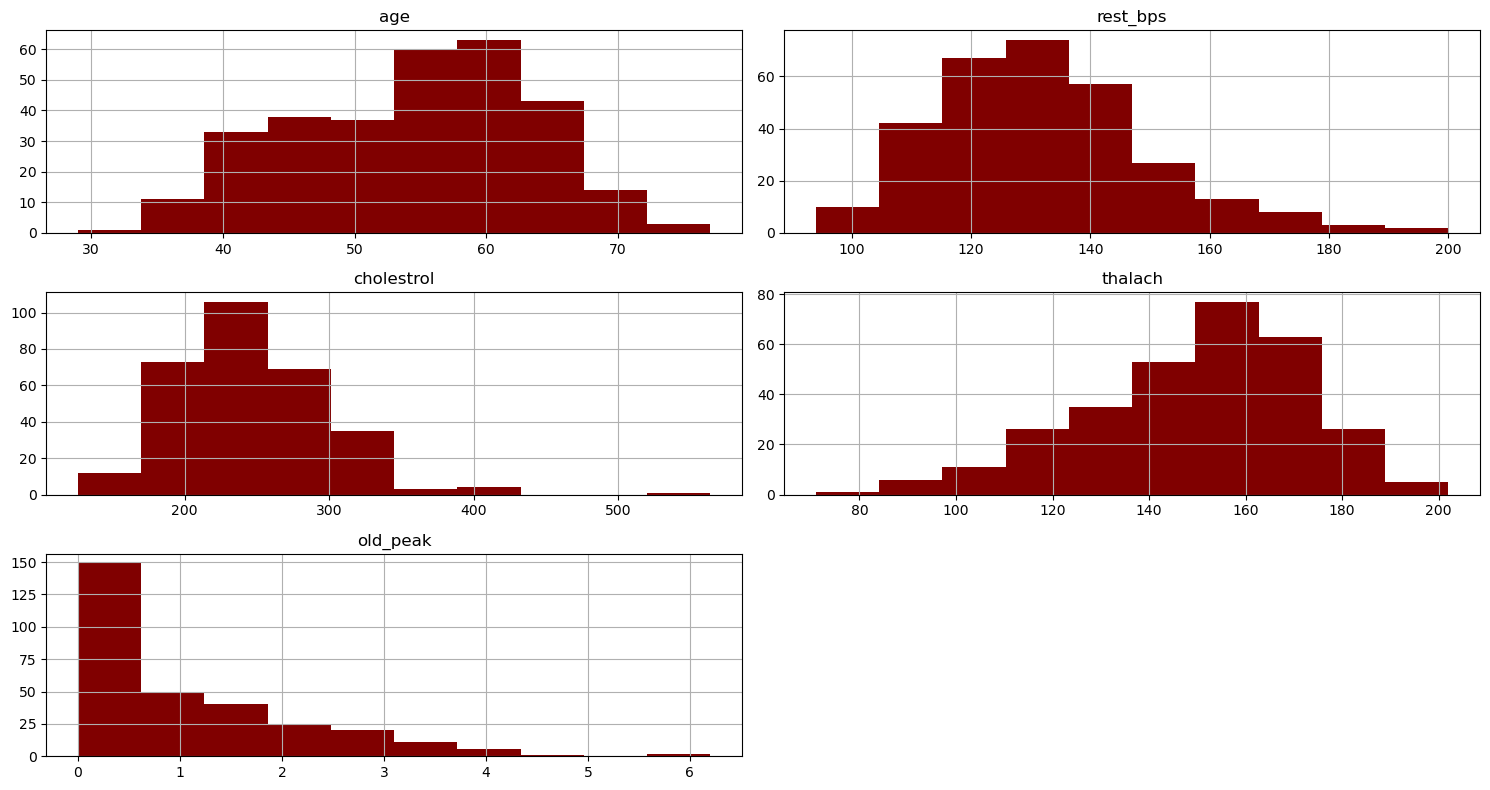

In [14]:
df_features.hist( color = "maroon")
plt.tight_layout()
plt.show()

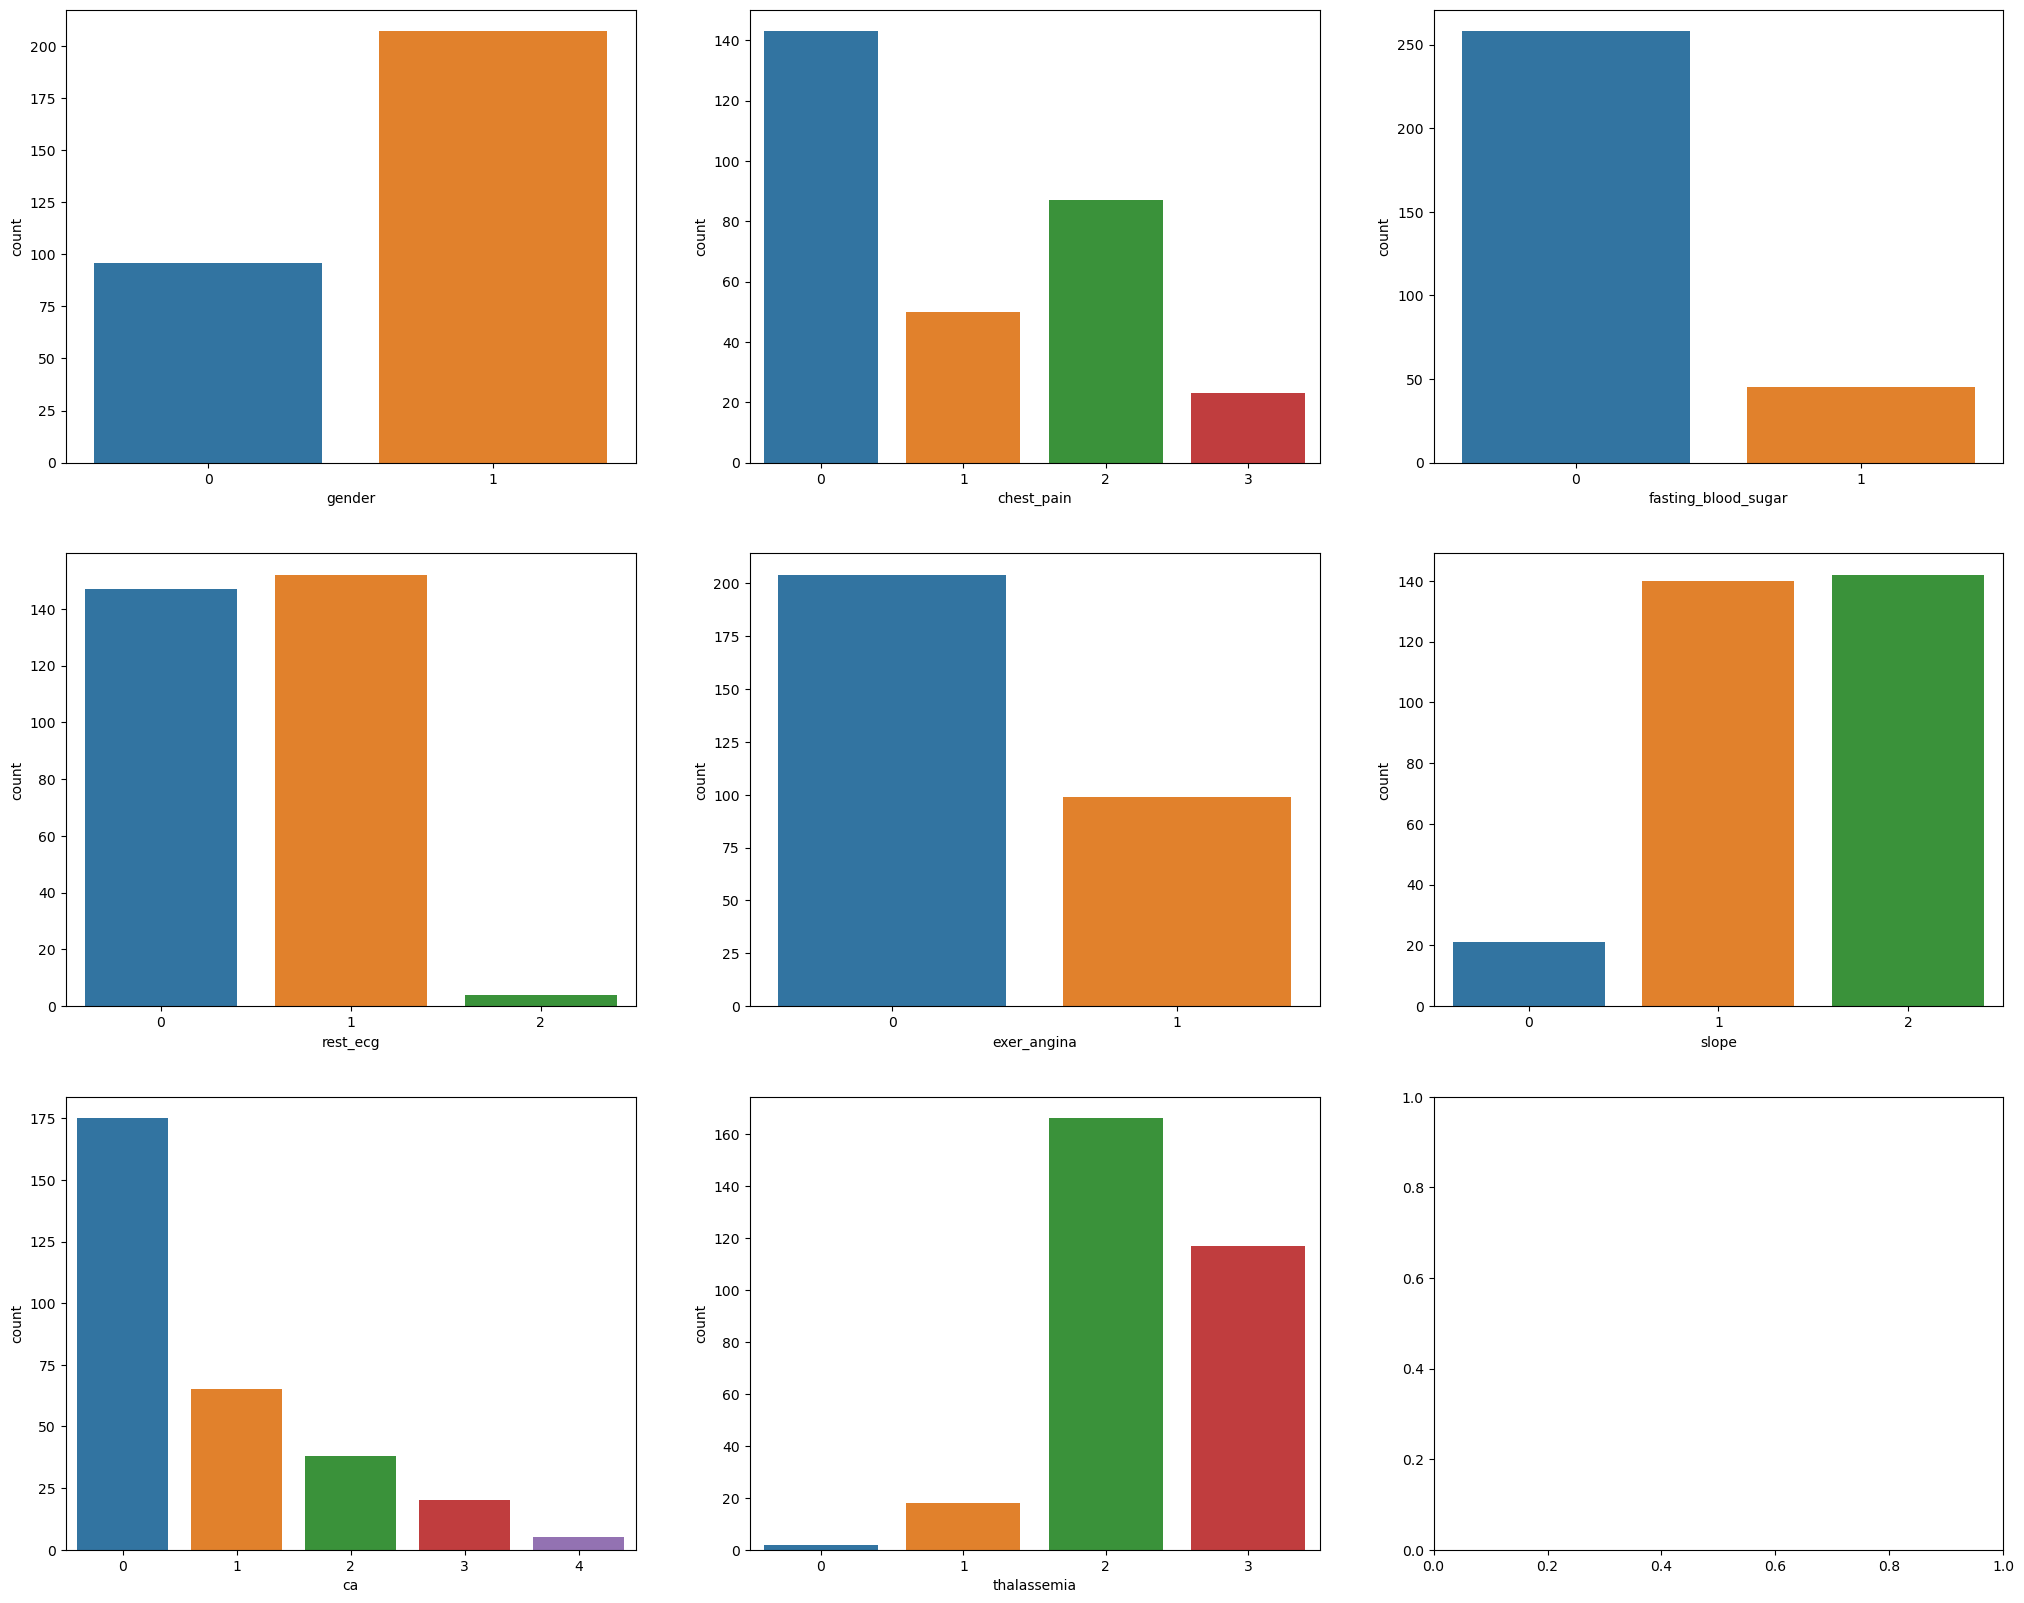

In [15]:
categorical = []
for i in df_features:
    if is_string_dtype(df_features[i]):
        categorical.append(i)

fig, ax = plt.subplots(nrows = 3, ncols = 3, figsize = (25,20))

for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(df_heart[variable], ax = subplot)
plt.show()

### Distribution of Target Variable

In [16]:
frequancy = df_target.value_counts()
frequancy

1    165
0    138
Name: target, dtype: int64

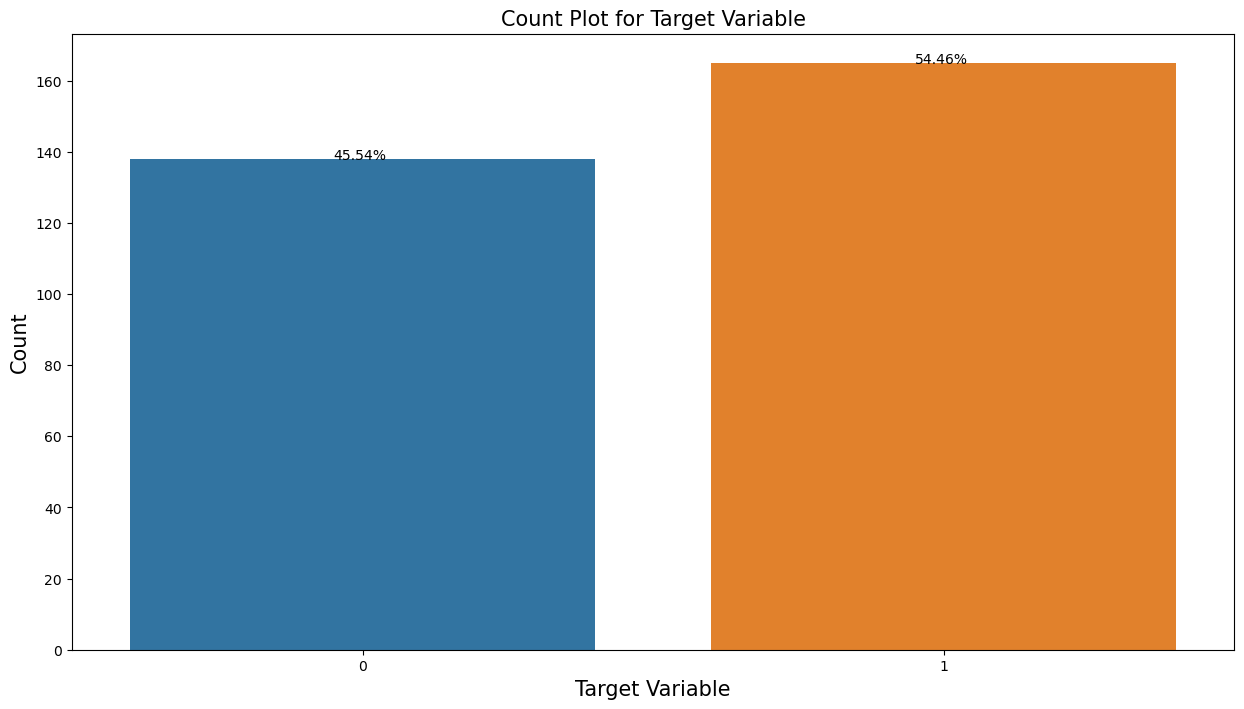

In [17]:
sns.countplot(df_target)
plt.text(x = -0.05, y = df_target.value_counts()[0],
         s = str(round((frequancy[0])*100/len(df_target),2)) + '%')
plt.text(x = 0.95, y = df_target.value_counts()[1],
         s = str(round((frequancy[1])*100/len(df_target),2)) + '%')
plt.title('Count Plot for Target Variable', fontsize = 15)
plt.xlabel('Target Variable', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

# Correlation

In [18]:
corr = df_features.corr()
corr

,age,rest_bps,cholestrol,thalach,old_peak
age,1.000000,0.279351,0.213678,-0.398522,0.210013
rest_bps,0.279351,1.000000,0.123174,-0.046698,0.193216
cholestrol,0.213678,0.123174,1.000000,-0.009940,0.053952
thalach,-0.398522,-0.046698,-0.009940,1.000000,-0.344187
old_peak,0.210013,0.193216,0.053952,-0.344187,1.000000


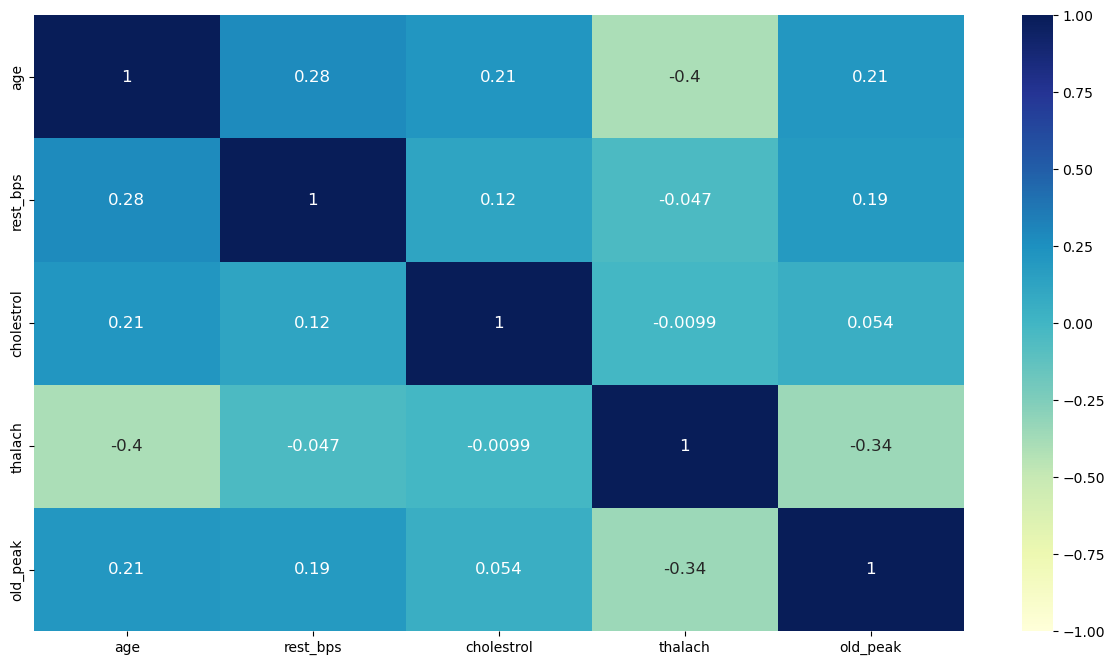

In [19]:
sns.heatmap(corr , cmap= "YlGnBu", vmax = 1.0,vmin = -1.0, annot = True, annot_kws = {"size" : 12})
plt.show()

From the above heatmap, it can seen that the continuous variables are not highly correlated with each other since all the correlation coefficients are less than close to 0.5. The maximum positive correlation is 0.28 between 'age' and 'rest_bps'. Variable 'thalach' has a moderate negative correlation with variables 'age' (-0.4) and 'old_peak'(-0.34). It can be concluded that there is no multicollinearity in the data.

Note: The diagonal values are always 1 because it is the correlation of the variable with itself.

# Outliers
	
To detect outliers in numeric data, we perform the following:

1. Plot the boxplot for numeric data
2. Note the variables in which outliers are present
3. Remove outliers by IQR method
4. Plot the boxplot to recheck for outliers

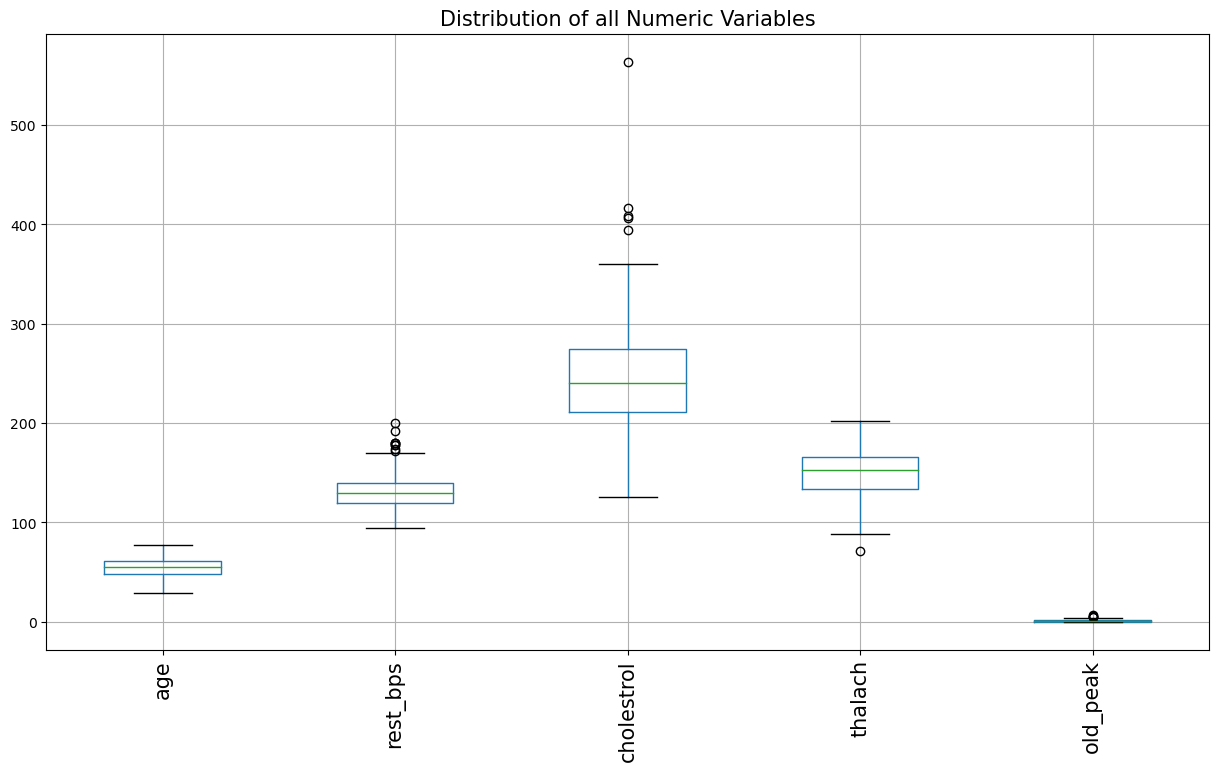

In [20]:
df_features.boxplot()
plt.title('Distribution of all Numeric Variables', fontsize = 15)
plt.xticks(rotation = "vertical", fontsize = 15)
plt.show()

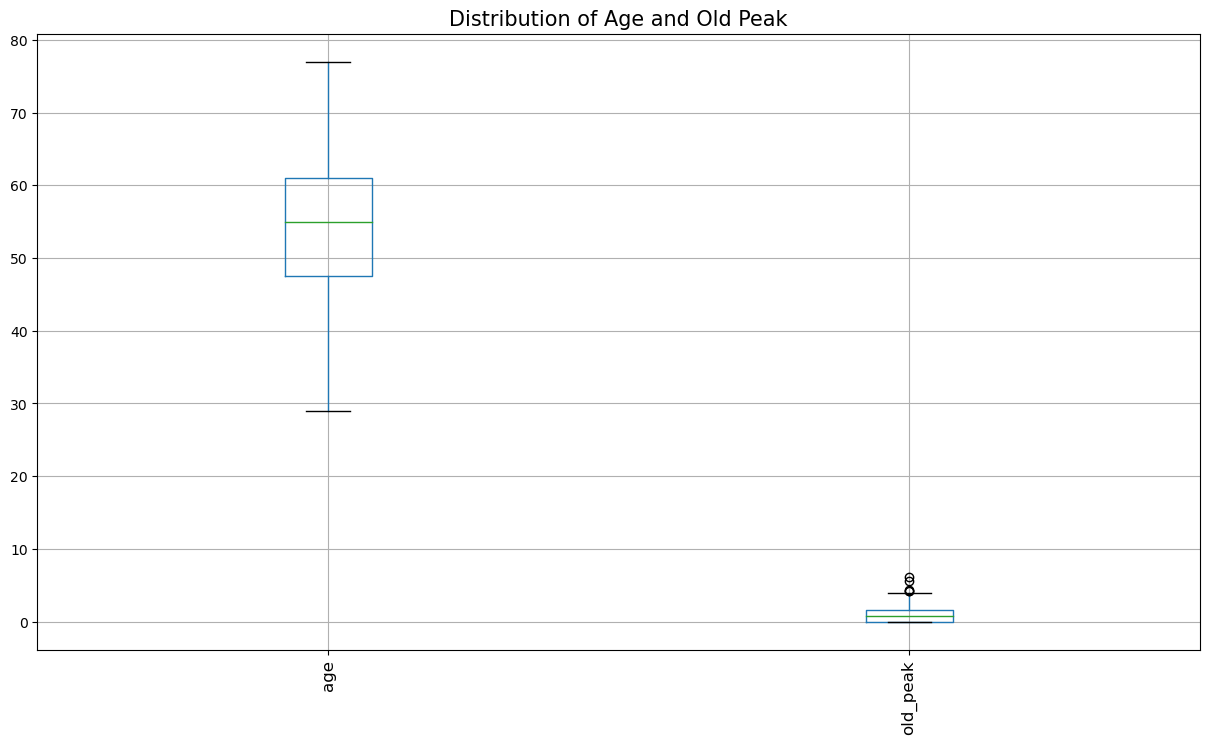

In [21]:
cols = ["age","old_peak"]
df_features[cols].boxplot()
plt.title("Distribution of Age and Old Peak",fontsize = 15)
plt.xticks(rotation = "vertical",fontsize = 12)
plt.show()

### Removing  the outliers

In [22]:
Q1 = df_features.quantile(0.25)
Q3 = df_features.quantile(0.75)
IQR = Q3-Q1

lower_cut = Q1-1.5*IQR
upper_cut = Q3+1.5*IQR

In [23]:
IQR

age           13.5
rest_bps      20.0
cholestrol    63.5
thalach       32.5
old_peak       1.6
dtype: float64

In [24]:
# '~' returns the values that do not satisfy the given conditions 
df_heart = df_heart[~((df_heart < lower_cut) | (df_heart > upper_cut)).any(axis = 1)]
df_heart = df_heart.reset_index(drop = True)

In [25]:
df_heart

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1
9,54,1,0,140,239,0,1,160,0,1.2,2,0,2,1


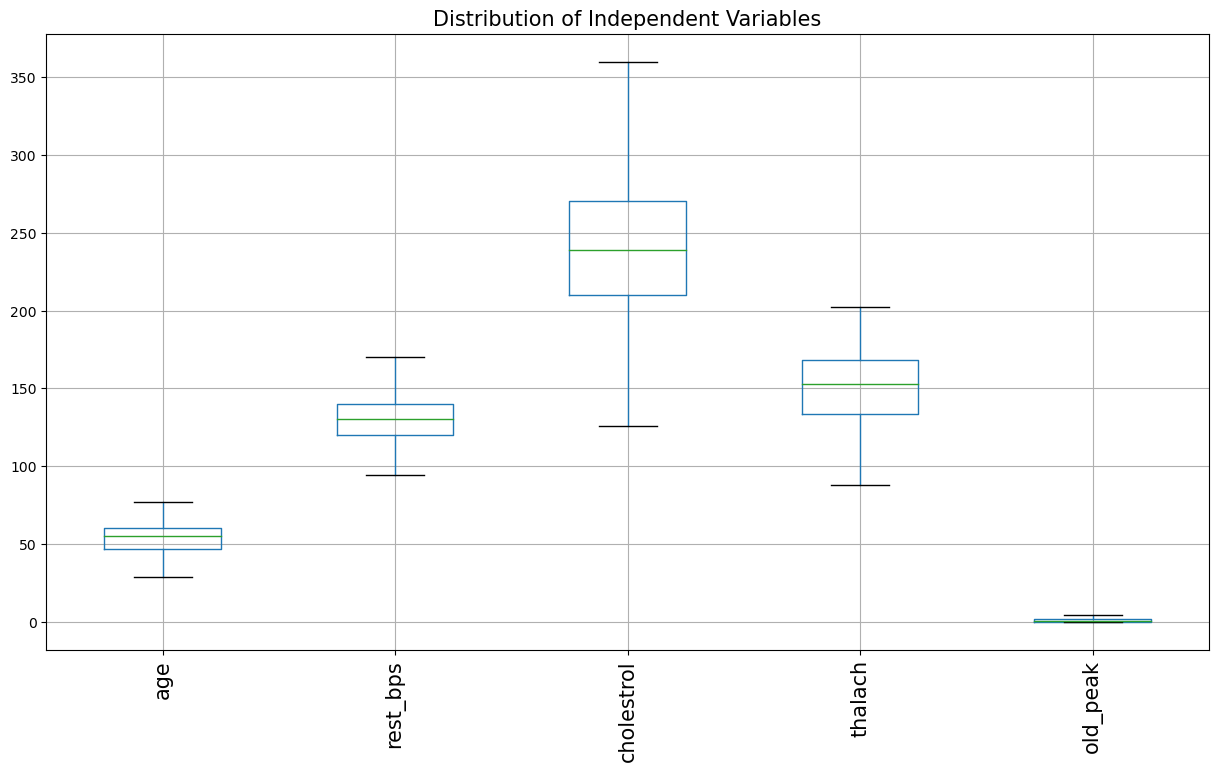

In [26]:
cols = ['age','rest_bps','cholestrol','thalach','old_peak']
df_heart[cols].boxplot()
plt.title('Distribution of Independent Variables', fontsize = 15)
plt.xticks(rotation = 'vertical', fontsize = 15)
plt.show()

In [27]:
df_heart.shape

(284, 14)

# Missing Values

In [28]:
Total = df_heart.isnull().sum().sort_values(ascending = False)
Total

age                    0
gender                 0
chest_pain             0
rest_bps               0
cholestrol             0
fasting_blood_sugar    0
rest_ecg               0
thalach                0
exer_angina            0
old_peak               0
slope                  0
ca                     0
thalassemia            0
target                 0
dtype: int64

In [29]:
Total = df_heart.isnull().sum().sort_values(ascending = False)
percent = (df_heart.isnull().sum()*100/df_heart.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([Total,percent],axis = 1, keys = ["Total","Percentage of Missinga values"])
missing_data

,Total,Percentage of Missinga values
age,0,0.0
gender,0,0.0
chest_pain,0,0.0
rest_bps,0,0.0
cholestrol,0,0.0
fasting_blood_sugar,0,0.0
rest_ecg,0,0.0
thalach,0,0.0
exer_angina,0,0.0
old_peak,0,0.0


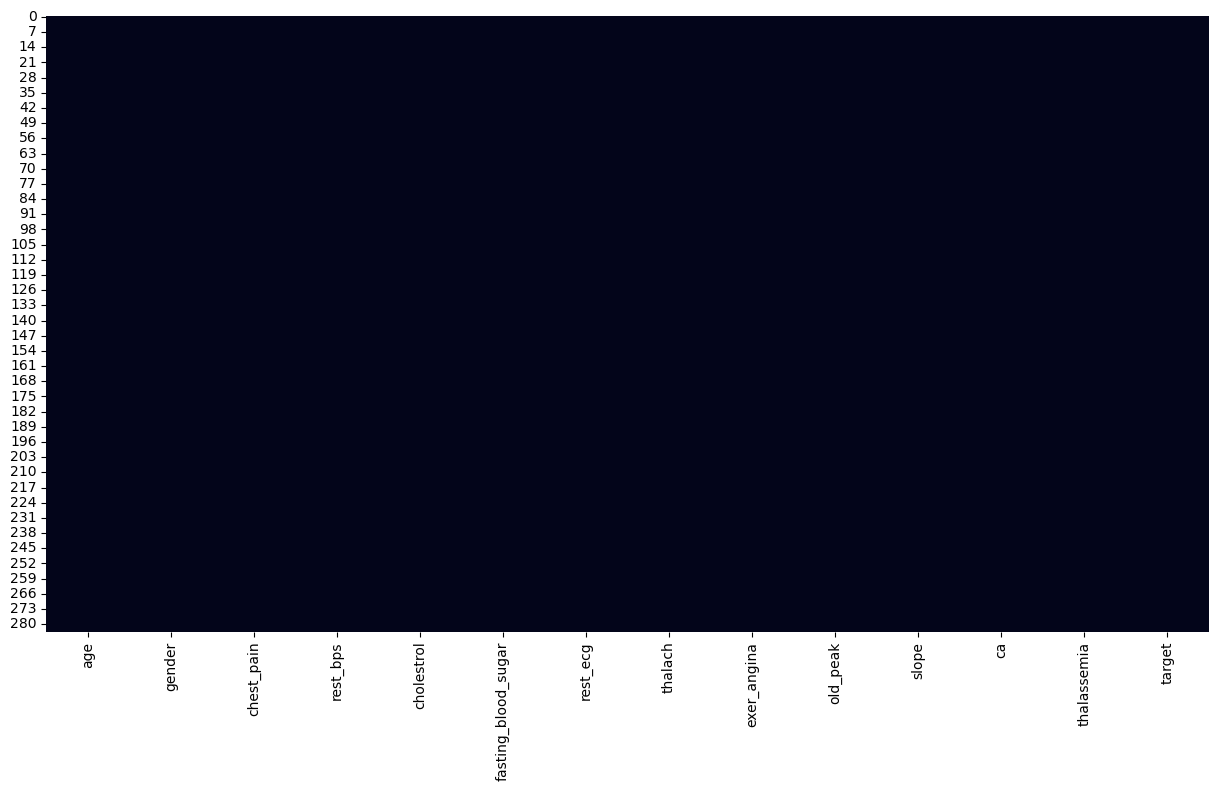

In [30]:
sns.heatmap(df_heart.isnull(), cbar=False)

# display the plot
plt.show()

# Prepareing The Data
* **build the classification models, we need to encode the categorical variables using dummy encoding.**

In [31]:
df_cat = df_heart.select_dtypes(include = object)
df_num = df_heart.select_dtypes(include = np.number)

In [32]:
df_cat.head()

,gender,chest_pain,fasting_blood_sugar,rest_ecg,exer_angina,slope,ca,thalassemia
0,1,3,1,0,0,0,0,1
1,1,2,0,1,0,0,0,2
2,0,1,0,0,0,2,0,2
3,1,1,0,1,0,2,0,2
4,0,0,0,1,1,2,0,2


In [33]:
df_num.head()

,age,rest_bps,cholestrol,thalach,old_peak,target
0,63,145,233,150,2.3,1
1,37,130,250,187,3.5,1
2,41,130,204,172,1.4,1
3,56,120,236,178,0.8,1
4,57,120,354,163,0.6,1


In [34]:
df_cat_dummies = pd.get_dummies(df_cat, drop_first = True)

In [35]:
df_cat_dummies.head()

,gender_1,chest_pain_1,chest_pain_2,chest_pain_3,fasting_blood_sugar_1,rest_ecg_1,rest_ecg_2,exer_angina_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thalassemia_1,thalassemia_2,thalassemia_3
0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0
1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0


# Concatenate Categorical and Continious Variable

In [36]:
df_heart_dummy = pd.concat([df_num, df_cat_dummies], axis=1)
df_heart_dummy.head()

,age,rest_bps,cholestrol,thalach,old_peak,target,gender_1,chest_pain_1,chest_pain_2,chest_pain_3,fasting_blood_sugar_1,rest_ecg_1,rest_ecg_2,exer_angina_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thalassemia_1,thalassemia_2,thalassemia_3
0,63,145,233,150,2.3,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0


In [37]:
y = pd.DataFrame(df_heart_dummy['target'])
X = df_heart_dummy.drop('target',axis = 1)

In [38]:
X.head()

,age,rest_bps,cholestrol,thalach,old_peak,gender_1,chest_pain_1,chest_pain_2,chest_pain_3,fasting_blood_sugar_1,rest_ecg_1,rest_ecg_2,exer_angina_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thalassemia_1,thalassemia_2,thalassemia_3
0,63,145,233,150,2.3,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
4,57,120,354,163,0.6,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0


In [64]:
def get_test_report(model):
    
    # return the performace measures on test set
    return(classification_report(y_test, y_pred))

In [39]:
def kappa_score(model):
    
    # return the kappa score on test set
    return(cohen_kappa_score(y_test, y_pred))

In [61]:
def plot_confusion_matrix(model):
    
    cm = confusion_matrix(y_test,y_pred)
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'],
                               index = ['Actual:0','Actual:1'])
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']),
                cbar = False, linewidths = 0.1, annot_kws = {'size':25})

    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)

    # display the plot
    plt.show()

In [41]:
# define a function to plot the ROC curve and print the ROC-AUC score
def plot_roc(model):
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

    plt.plot(fpr, tpr)

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])

    plt.plot([0, 1], [0, 1],'r--')


    plt.title('ROC Curve for Heart Disease Classifier', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)


    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test, y_pred_prob),4)))

    # plot the grid
    plt.grid(True)

In [42]:
score_card = pd.DataFrame(columns=['Model', 'AUC Score', 'Precision Score', 'Recall Score',
                                   'Accuracy Score', 'Kappa Score', 'f1-score'])

 
def update_score_card(model_name):
    
    global score_card


    score_card = score_card.append({'Model': model_name,
                                    'AUC Score' : roc_auc_score(y_test, y_pred_prob),
                                    'Precision Score': metrics.precision_score(y_test, y_pred),
                                    'Recall Score': metrics.recall_score(y_test, y_pred),
                                    'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                                    'Kappa Score': cohen_kappa_score(y_test, y_pred),
                                    'f1-score': metrics.f1_score(y_test, y_pred)}, 
                                    ignore_index = True)
    return(score_card)

# Decision Tree
To build a Decision Tree, we do the following:

1. Split the data into training and test sets
2. Build the model
3. Plot the decision tree
4. Do predictions on the test set
5. Compute accuracy measures
6. Tabulate the results

In [43]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30, random_state = 10)
print("X_train",X_train.shape)
print("X_test",X_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

X_train (198, 22)
X_test (86, 22)
y_train (198, 1)
y_test (86, 1)


# Model Building

In [44]:
decision_tree = DecisionTreeClassifier(criterion = "entropy",random_state = 10)
decision_tree_model = decision_tree.fit(X_train,y_train)

# Ploting the decision tree

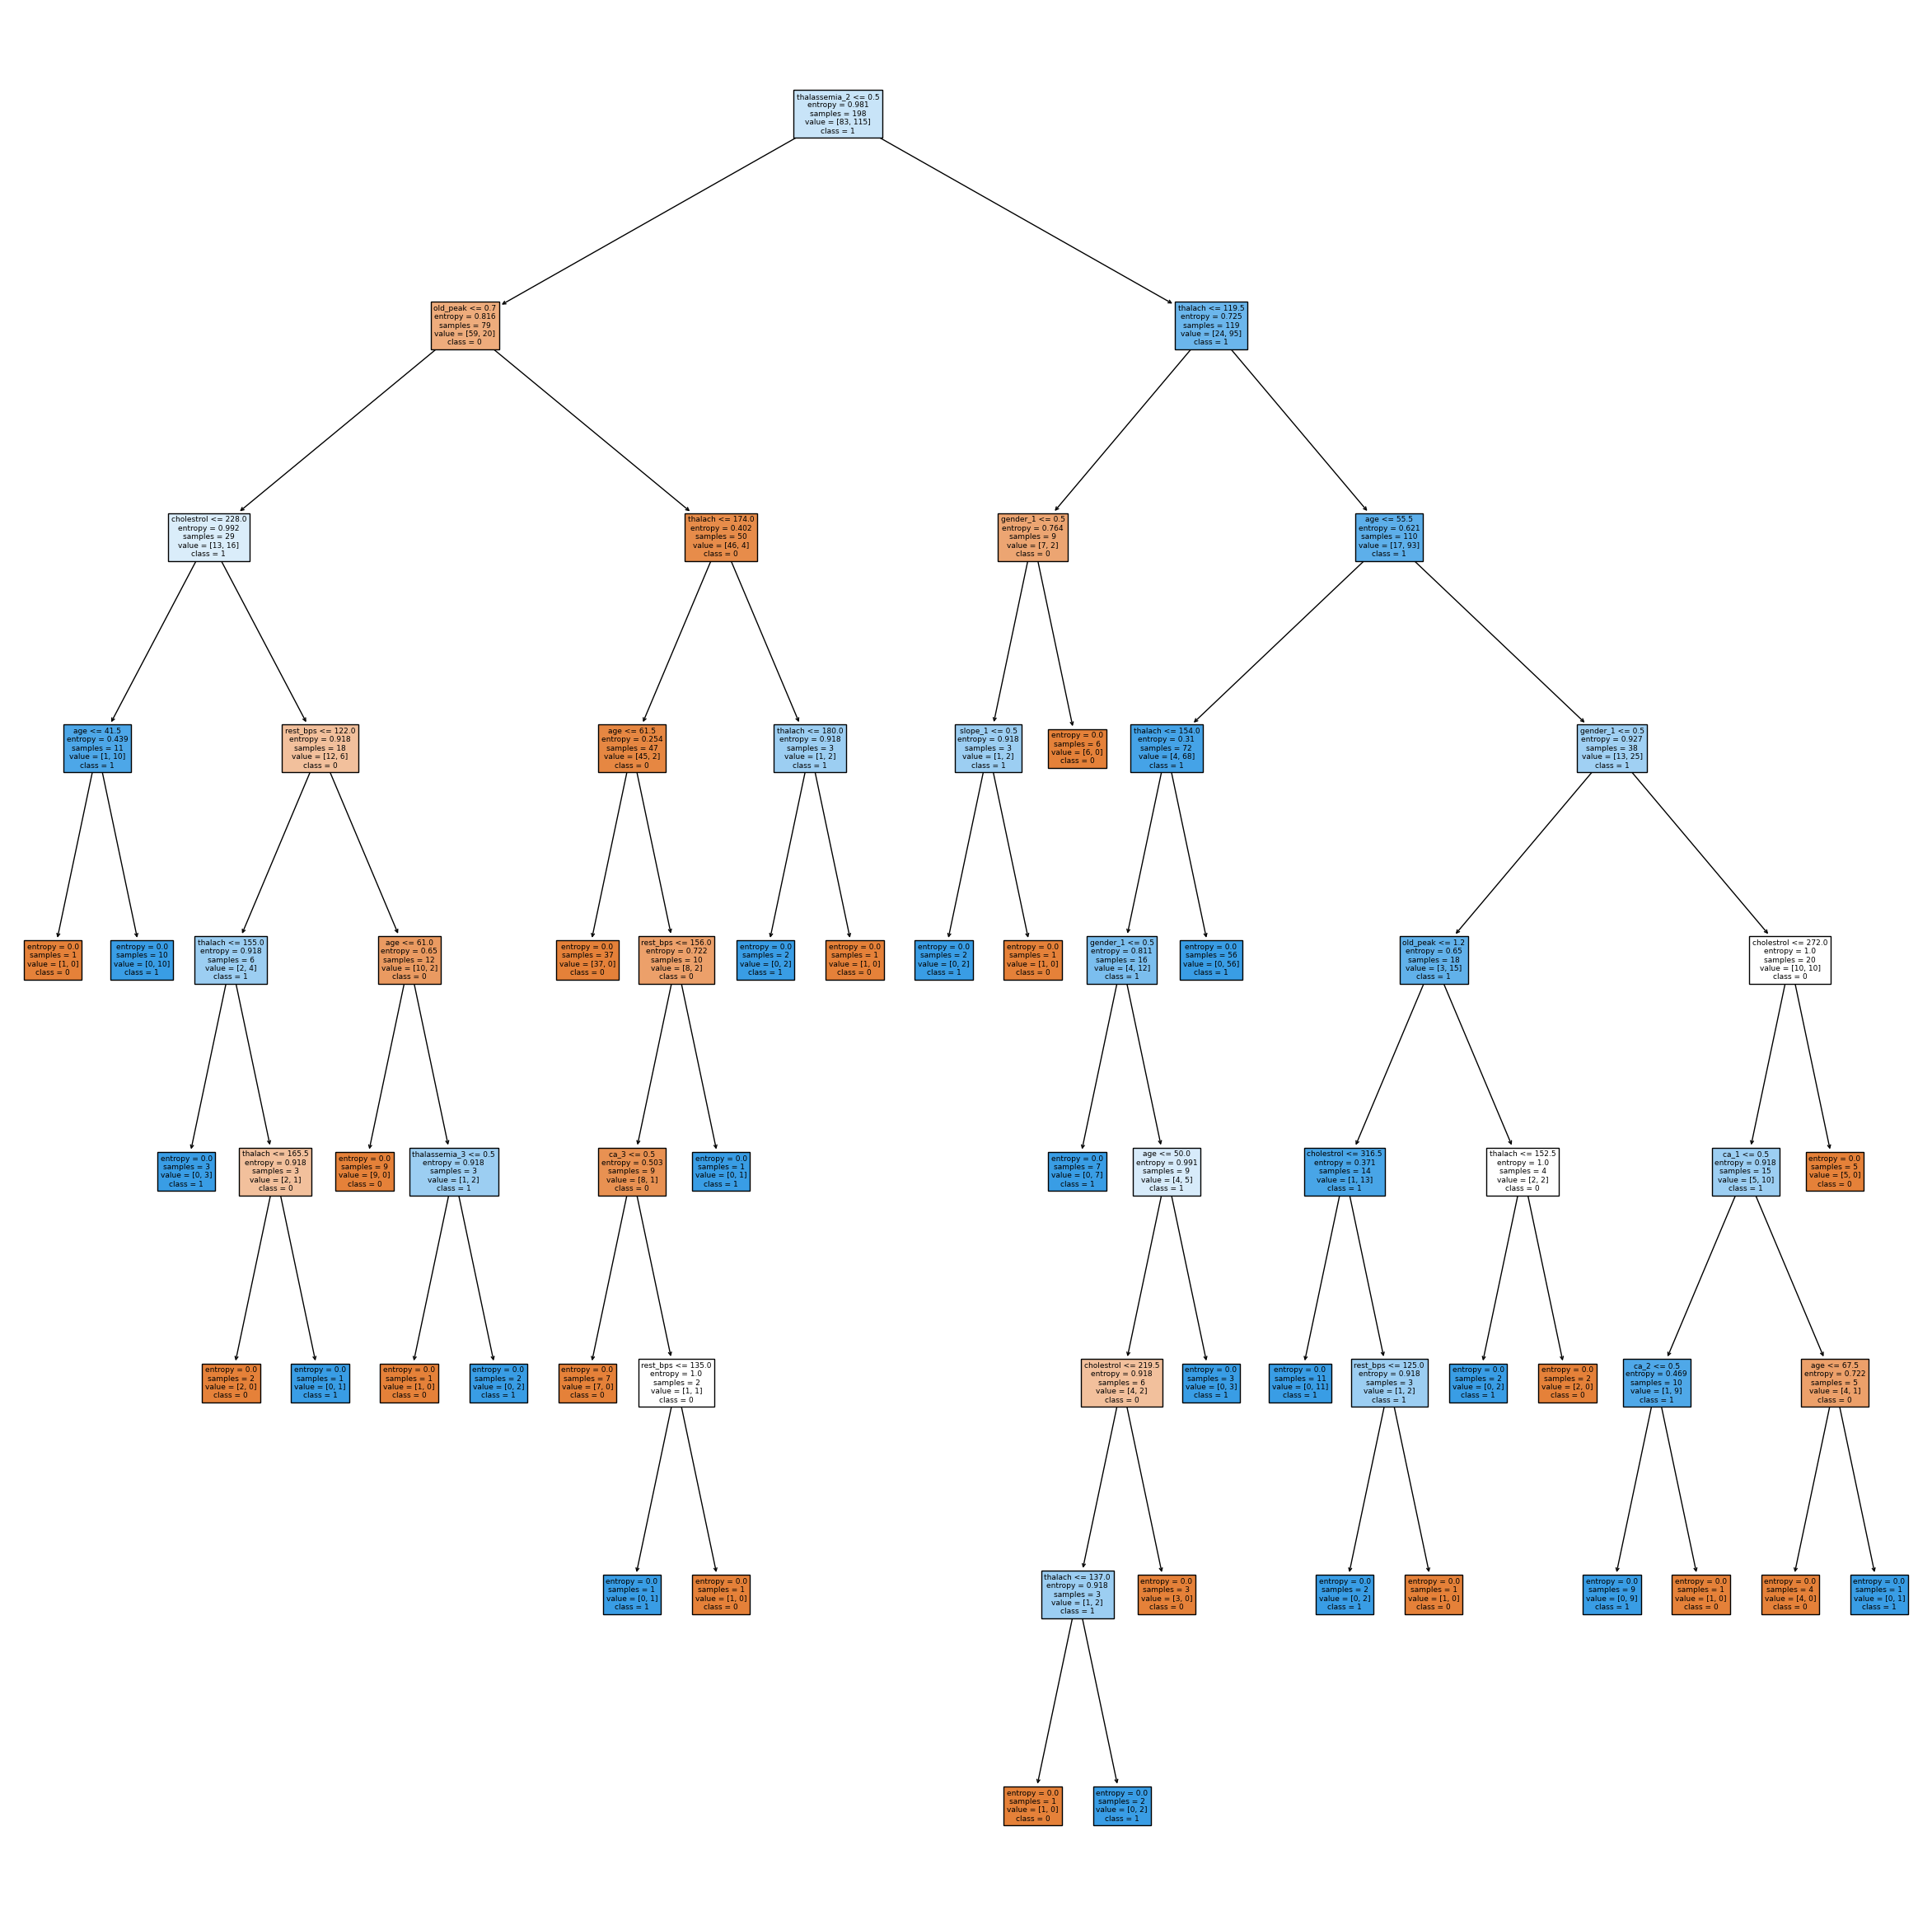

In [46]:
lables = X_train.columns
fig = plt.figure(figsize = (30,30))
_ = tree.plot_tree(decision_tree_model,
                  feature_names = lables,
                  class_names = ["0","1"],
                  filled = True)

# Do predictions on the test set

In [51]:
#predict probabilities on the test set
# consider the probability of positive class by subsetting with '[:,1]'
y_pred_prob = decision_tree_model.predict_proba(X_test)[:,1]
y_pred_prob

array([1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0.,
       1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1.,
       1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       0.])

In [53]:
y_pred = decision_tree_model.predict(X_test)
y_pred

array([1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0],
      dtype=int64)

In [57]:
y_test

,target
129,1
201,0
60,1
149,1
199,0
192,0
111,1
105,1
209,0
258,0


# Evaluate The Model

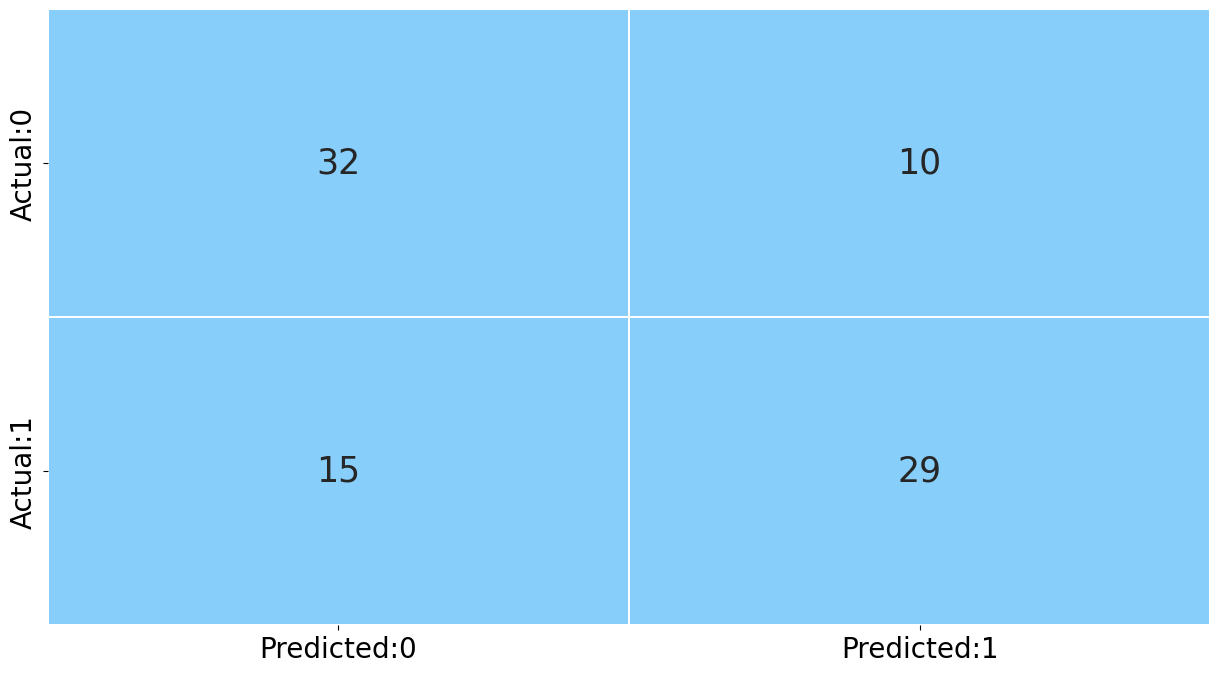

In [62]:
plot_confusion_matrix(decision_tree_model)

In [65]:
test_report = get_test_report(decision_tree_model)
print(test_report)

              precision    recall  f1-score   support

           0       0.68      0.76      0.72        42
           1       0.74      0.66      0.70        44

    accuracy                           0.71        86
   macro avg       0.71      0.71      0.71        86
weighted avg       0.71      0.71      0.71        86



### Interpretation: The accuracy is 71% for this model. Also, the sensitivity and specificity of the model is quite different.

In [66]:
kappa_value = kappa_score(decision_tree_model)

In [67]:
kappa_value

0.41985968699406373

**Interpretation:** As the kappa score for the decision tree is 0.4198, we can say that there is moderate agreement between the actual and predicted values.

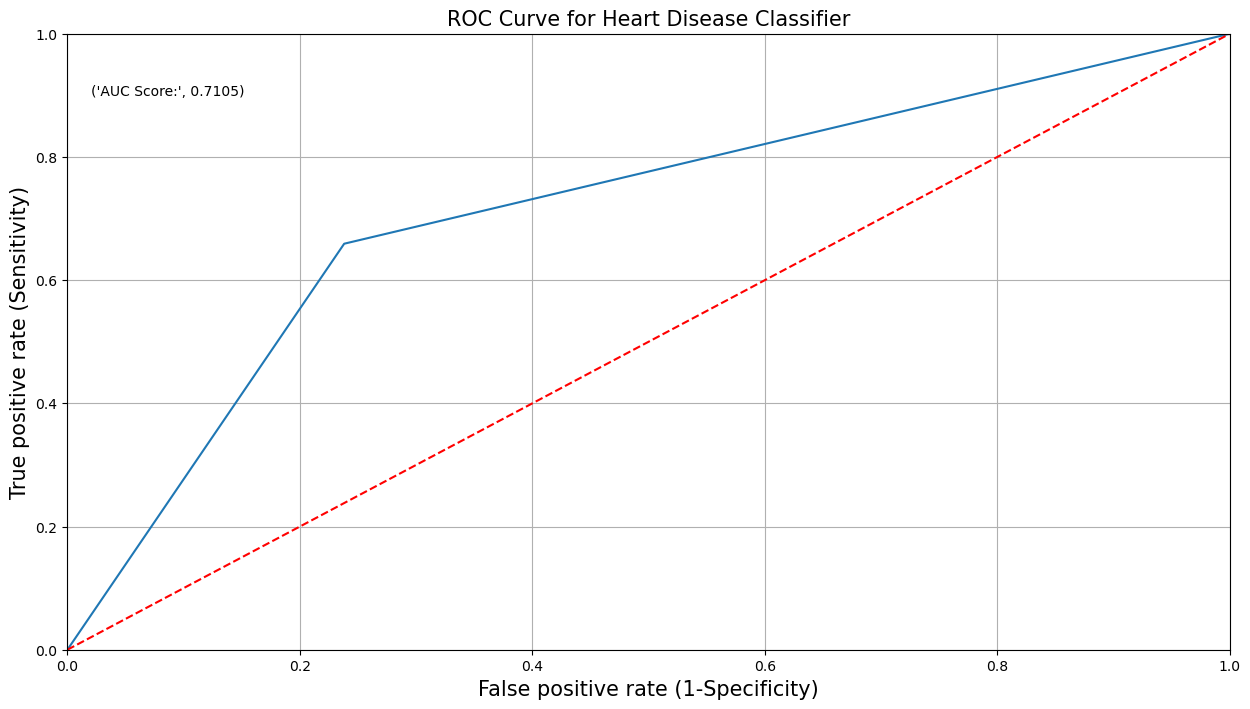

In [68]:
plot_roc(decision_tree_model)

# Tabulating the result

In [69]:
update_score_card(model_name ="Decision Tree")

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Decision Tree,0.710498,0.74359,0.659091,0.709302,0.41986,0.698795


# Prune a Decision Tree

Pruning reduces the size of the decision tree by removing the internal nodes of the tree. It decreases the complexity of the tree, and so improves the accuracy of prediction. It is useful because trees may fit the training data well, but may do a poor prediction on test data. A simpler tree often avoids over-fitting.
	
Now prune the decision tree, we start with our original data set gradually proceeding with our analysis

To prune a 'Decision Tree', we do the following:

1. Prune the decision tree
2. Plot the decision tree
3. Do predictions on the test set
4. Compute accuracy measures
5. Tabulate the results

In [70]:
prune = DecisionTreeClassifier(max_depth = 5,max_leaf_nodes = 25,criterion = "gini", random_state = 10)


In [72]:
decision_tree_prune = prune.fit(X_train, y_train)

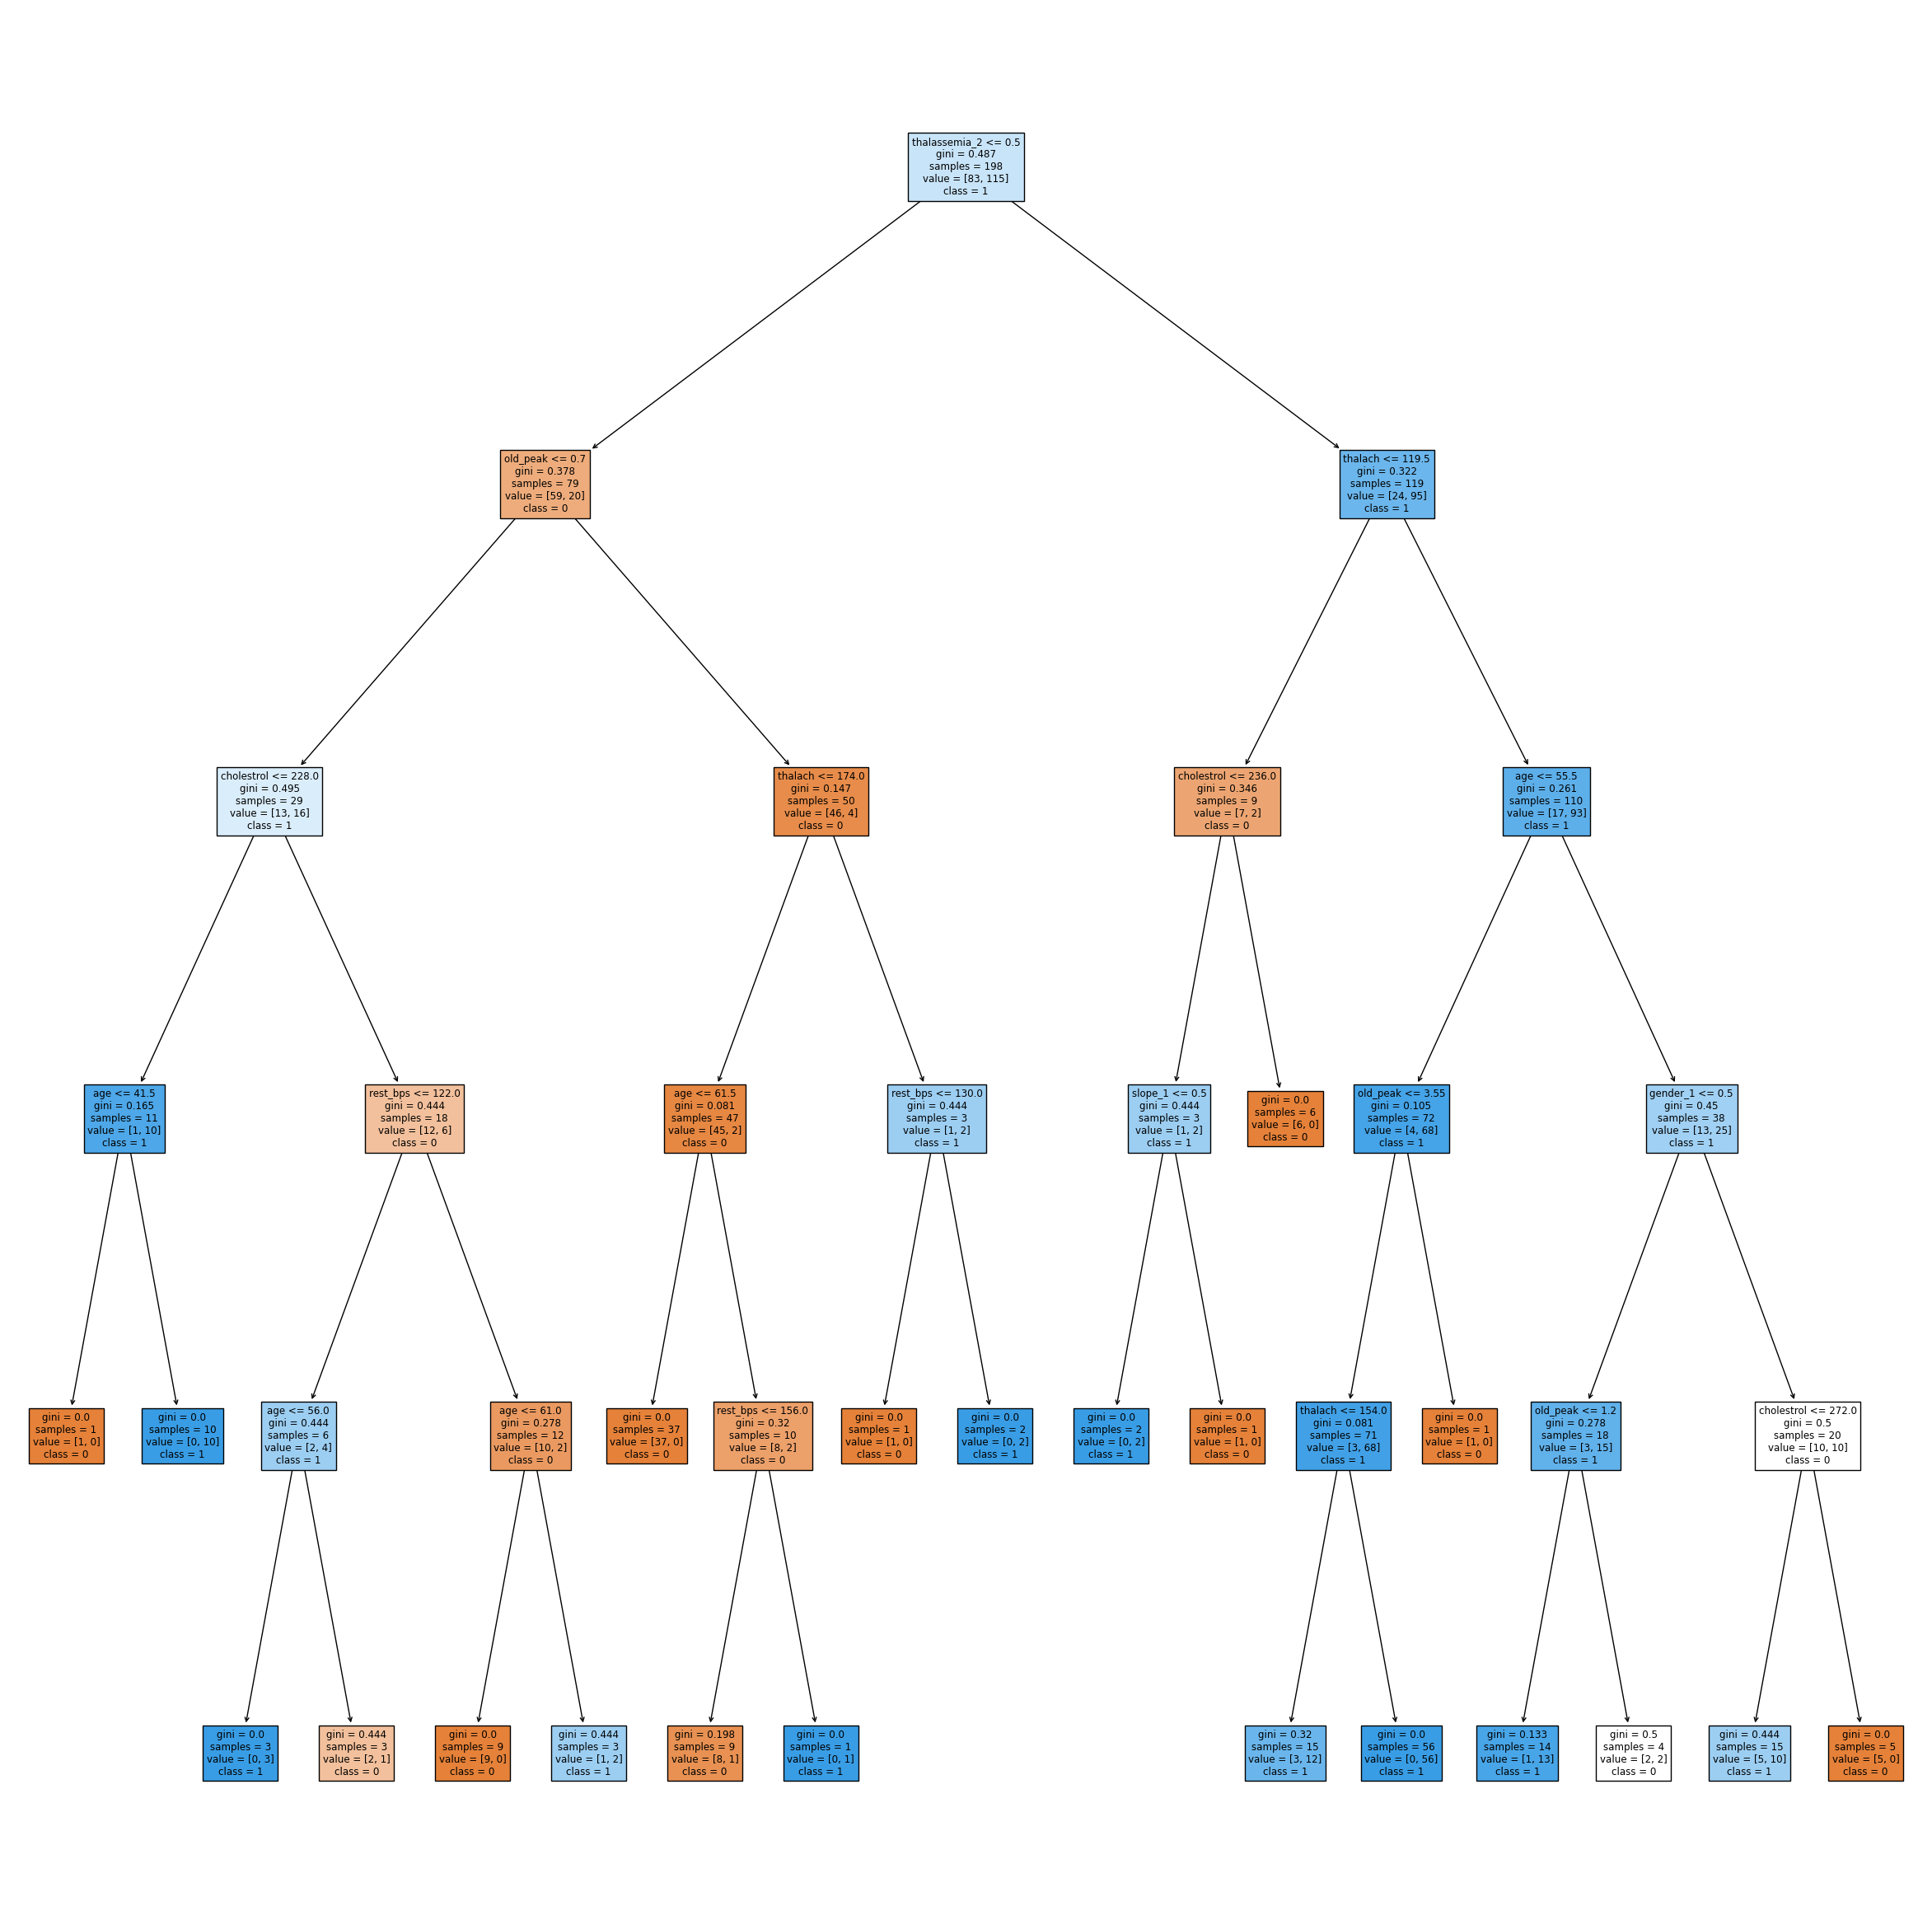

In [73]:
lables = X_train.columns

# plot the decision tree 
fig = plt.figure(figsize=(30,30))
_ = tree.plot_tree(decision_tree_prune, 
                   feature_names=lables,  
                   class_names=["0","1"],
                   filled=True)

In [74]:
y_pred_prob = decision_tree_prune.predict_proba(X_test)[:,1]

In [75]:
y_pred = decision_tree_prune.predict(X_test)

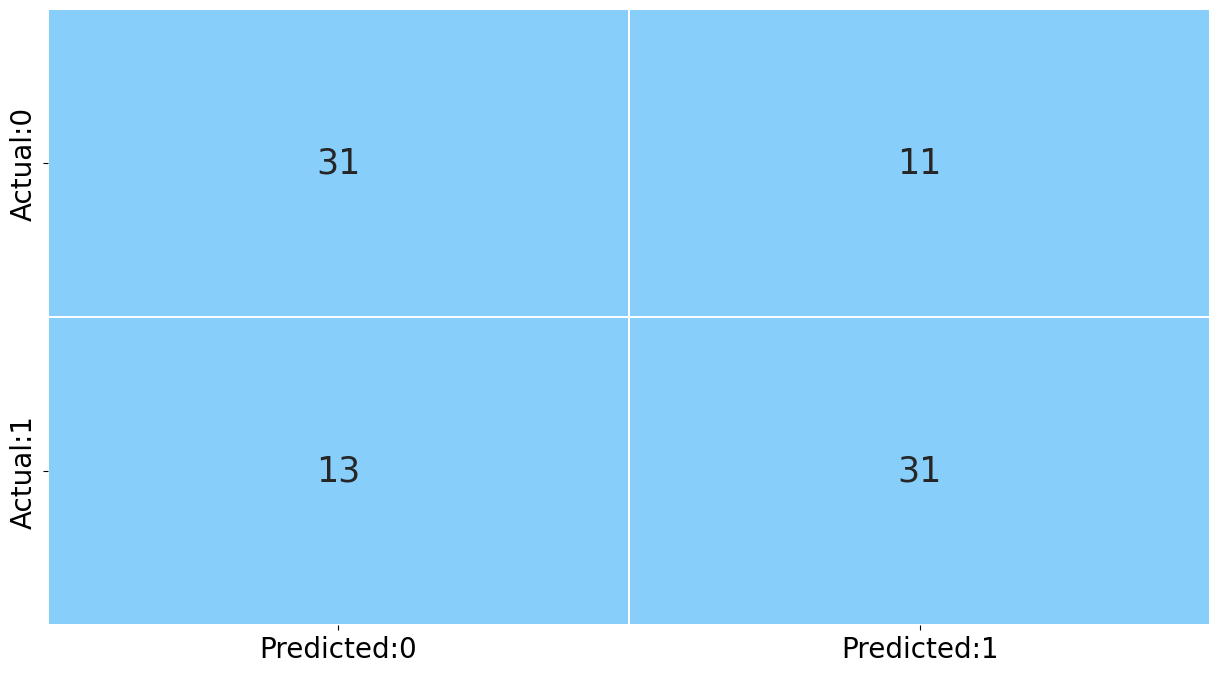

In [76]:
plot_confusion_matrix(decision_tree_prune)

In [77]:
test_report = get_test_report(decision_tree_prune)
print(test_report)

              precision    recall  f1-score   support

           0       0.70      0.74      0.72        42
           1       0.74      0.70      0.72        44

    accuracy                           0.72        86
   macro avg       0.72      0.72      0.72        86
weighted avg       0.72      0.72      0.72        86



**Interpretation:** The accuracy is 72% for this model.

In [79]:
kappa_value = kappa_score(decision_tree_prune)

print(kappa_value)

0.4421621621621622


**Interpretation:** As the kappa score for the decision tree (pruned) is 0.4421, we can say that there is moderate agreement between the actual and predicted values.

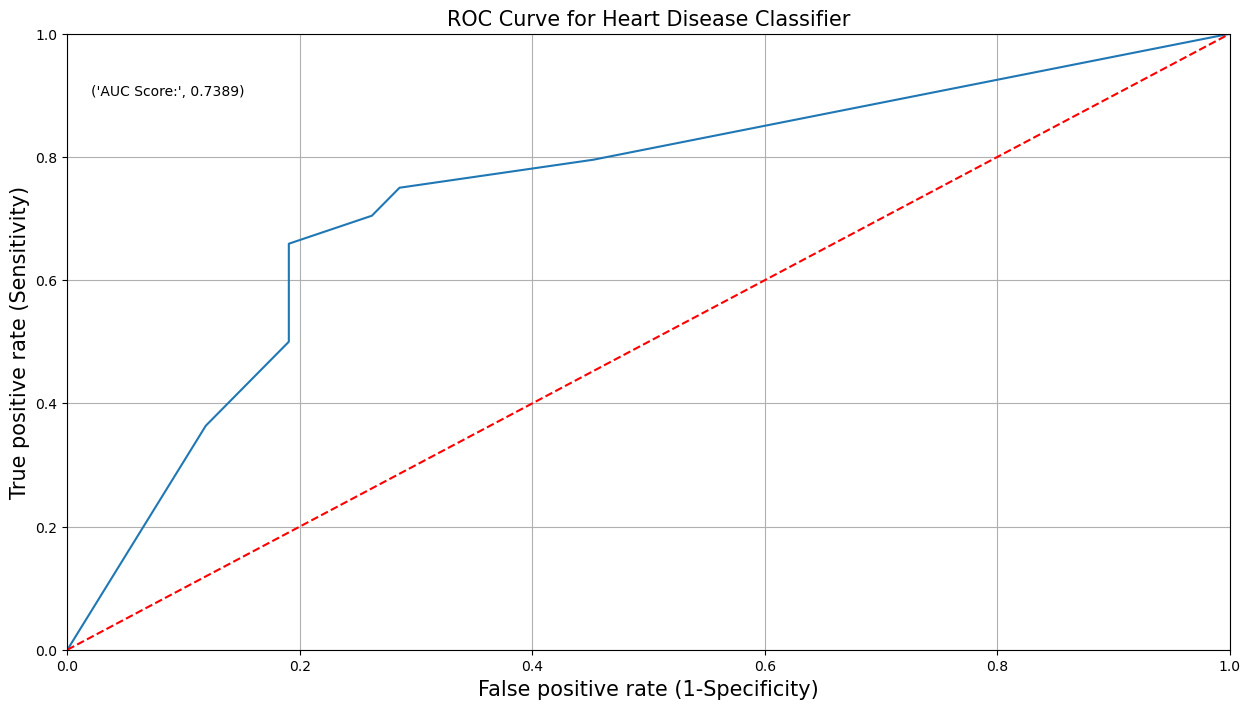

In [80]:
plot_roc(decision_tree_prune)

In [81]:
update_score_card(model_name = 'Decision Tree (Pruned)')

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Decision Tree,0.710498,0.743590,0.659091,0.709302,0.419860,0.698795
1,Decision Tree (Pruned),0.738907,0.738095,0.704545,0.720930,0.442162,0.720930


# Decision tree (using GridSearchCV)

ow we show how a decision tree is optimized by cross-validation, which is done using the GridSearchCV() from sklearn library.

The performance of the selected hyperparameters and trained model is then measured on the test set that was not used during the model building.

	
Now we build a decision tree using the GridSearchCV. We start with our original data set gradually proceeding with our analysis

To build a Decision Tree using GridSearchCV, we do the following:
1. Use GridSearch to obtain the optimal values of hyperparameters
2. Build the model using the hyperparameters obtained in step 1
3. Plot the decision tree
4. Do predictions on the test set
5. Compute accuracy measures
6. Tabulate the results

### Use GridSearch to obtain the optimal values of hyperparameters

In [83]:
tuned_paramaters = [{'criterion': ['gini', 'entropy'],
                     'min_samples_split': [10, 20, 30],
                     'max_depth': [3, 5, 7, 9],
                     'min_samples_leaf': [15, 20, 25, 30, 35],
                     'max_leaf_nodes': [5, 10, 15, 20, 25]}]

In [85]:
decision_tree_classification = DecisionTreeClassifier(random_state = 10)

In [88]:
grid = GridSearchCV(estimator = decision_tree_classification, param_grid = tuned_paramaters, cv = 5)
dt_grid = grid.fit(X_train,y_train)

print('Best parameters for decision tree classifier: ', dt_grid.best_params_, '\n')

Best parameters for decision tree classifier:  {'criterion': 'entropy', 'max_depth': 3, 'max_leaf_nodes': 5, 'min_samples_leaf': 15, 'min_samples_split': 10} 



In [89]:
dt_grid_model = DecisionTreeClassifier(criterion = dt_grid.best_params_.get('criterion'),
                                       max_depth = dt_grid.best_params_.get('max_depth'),
                                       max_leaf_nodes = dt_grid.best_params_.get('max_leaf_nodes'),
                                       min_samples_leaf = dt_grid.best_params_.get('min_samples_leaf'),
                                       min_samples_split = dt_grid.best_params_.get('min_samples_split'),
                                       random_state = 10)

# use fit() to fit the model on the train set
dt_grid_model = dt_grid_model.fit(X_train, y_train)

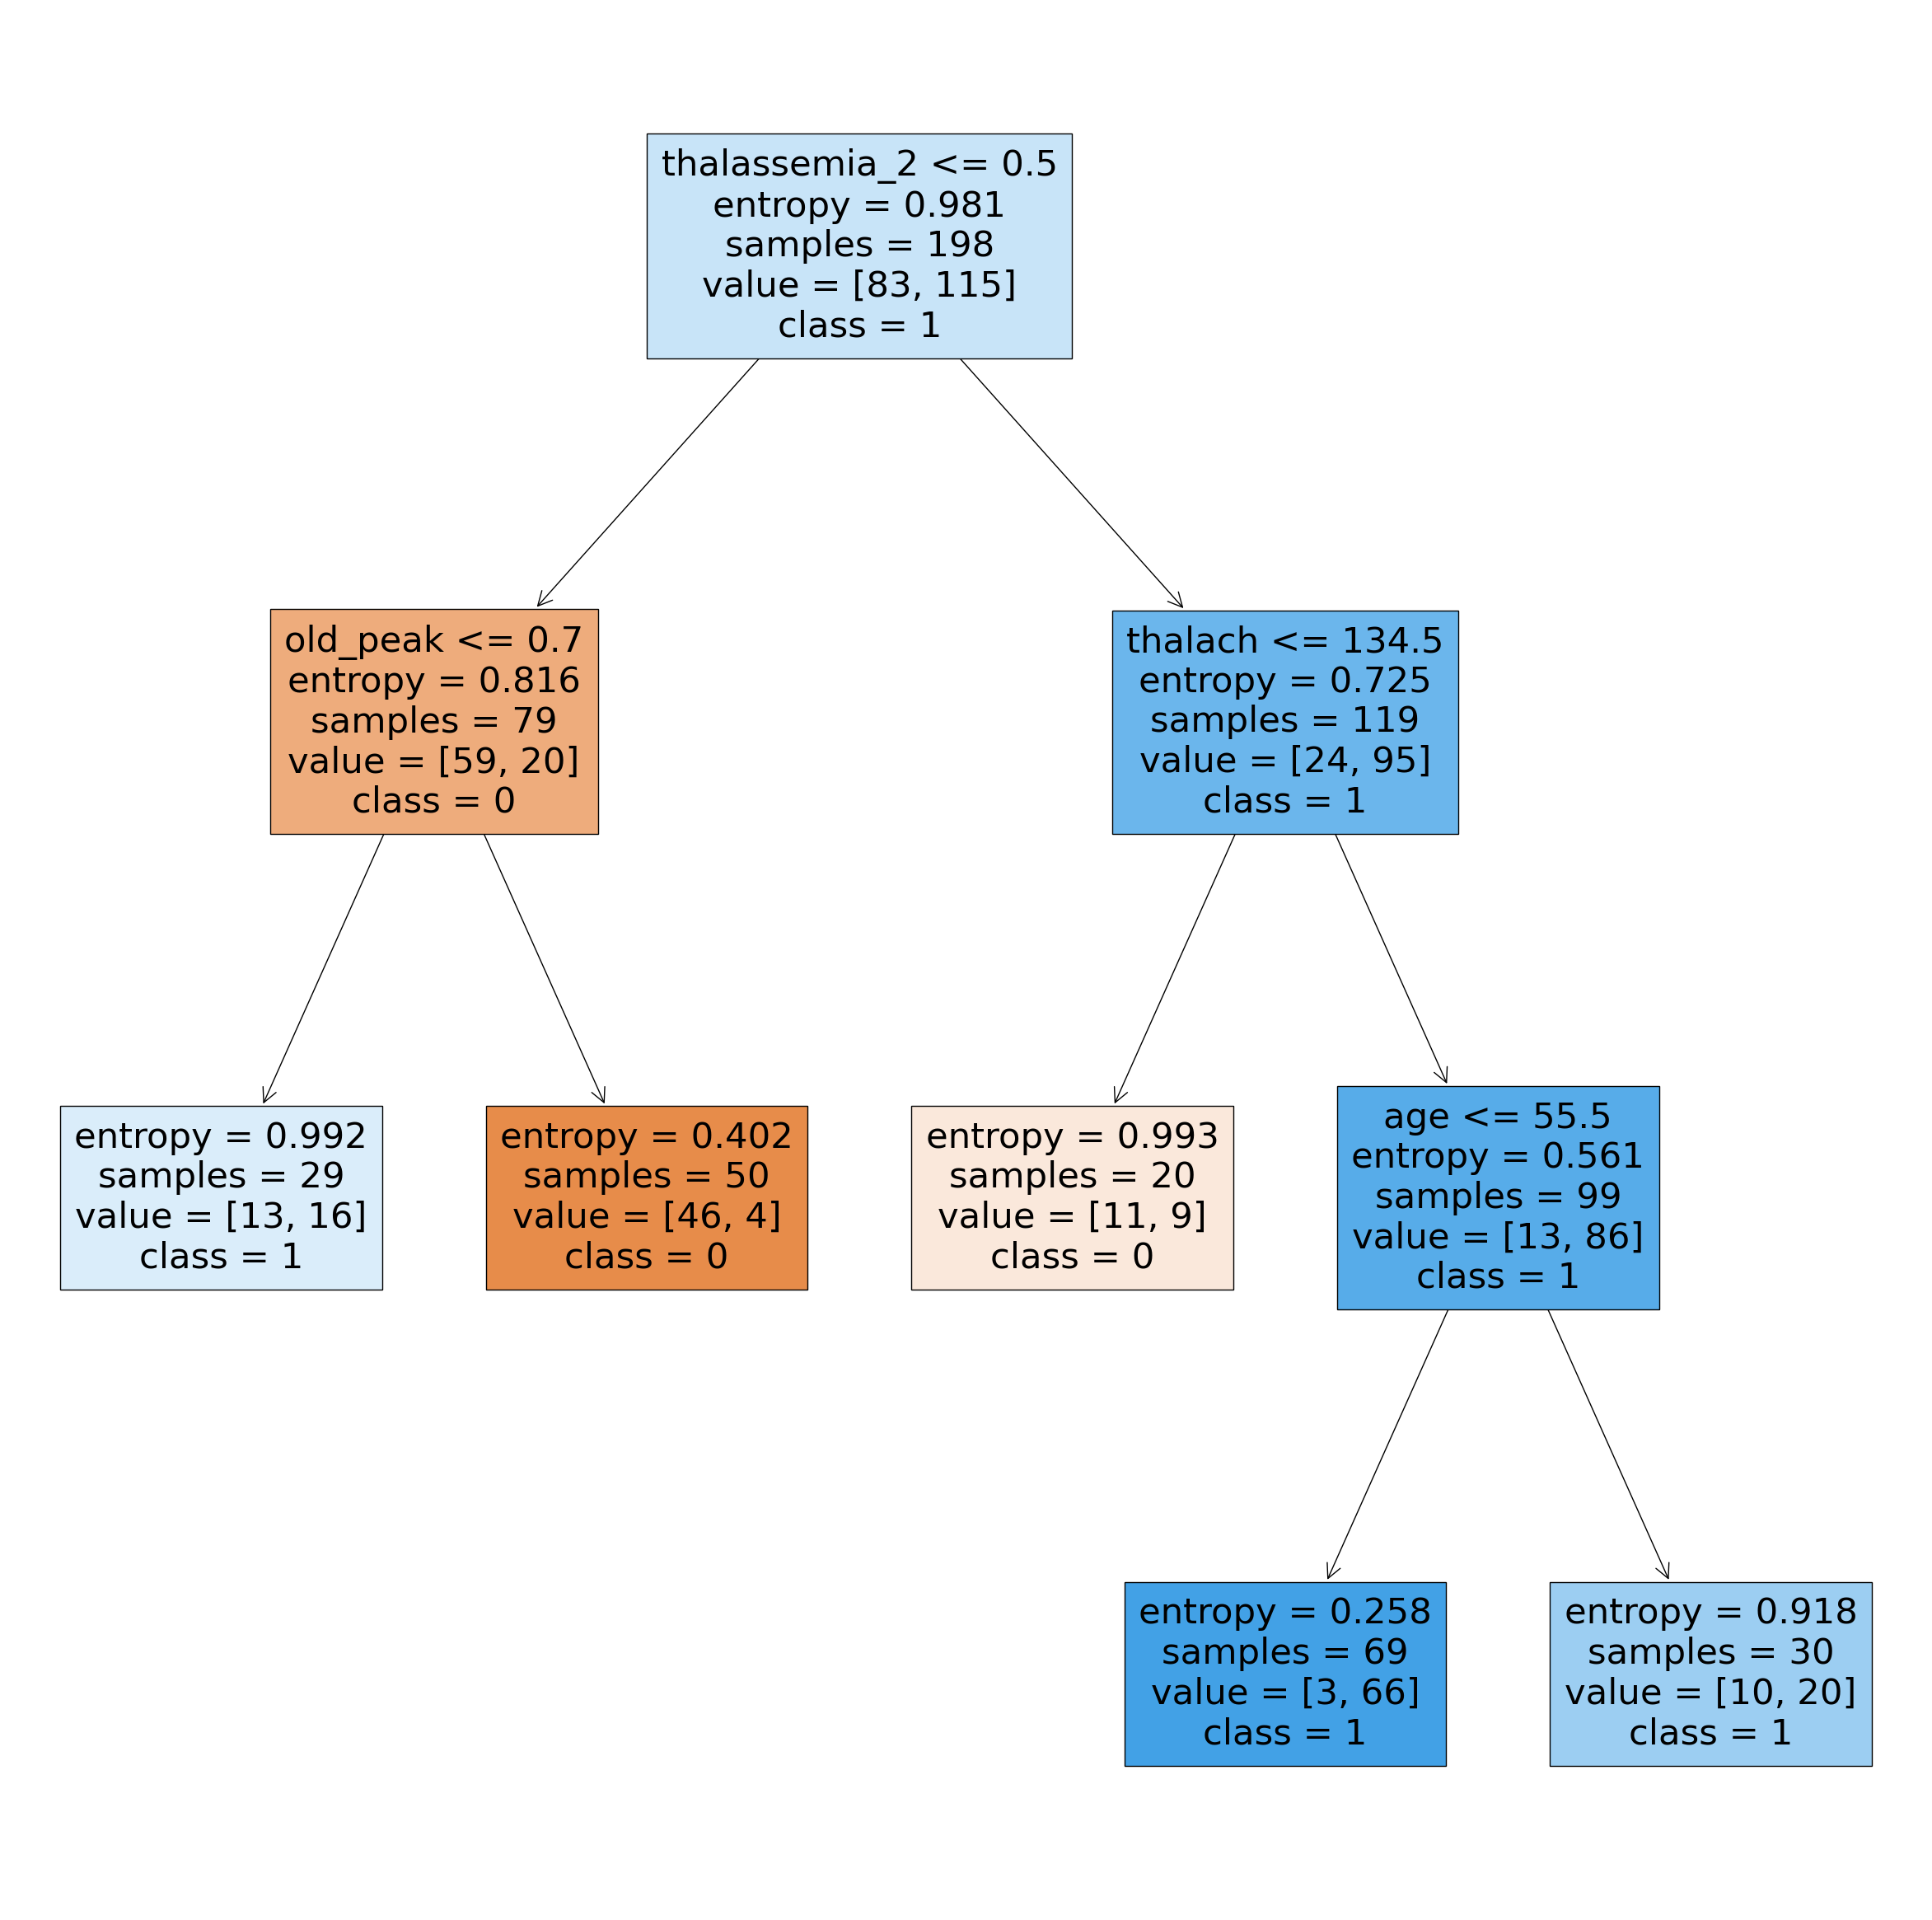

In [90]:
# save the column names in 'labels'
lables = X_train.columns

# plot the decision tree 
fig = plt.figure(figsize=(30,30))
_ = tree.plot_tree(dt_grid_model, 
                   feature_names=lables,  
                   class_names=["0","1"],
                   filled=True)

In [91]:
y_pred_prob = dt_grid_model.predict_proba(X_test)[:,1]

In [92]:
y_pred = dt_grid_model.predict(X_test)

# Evaluate Model

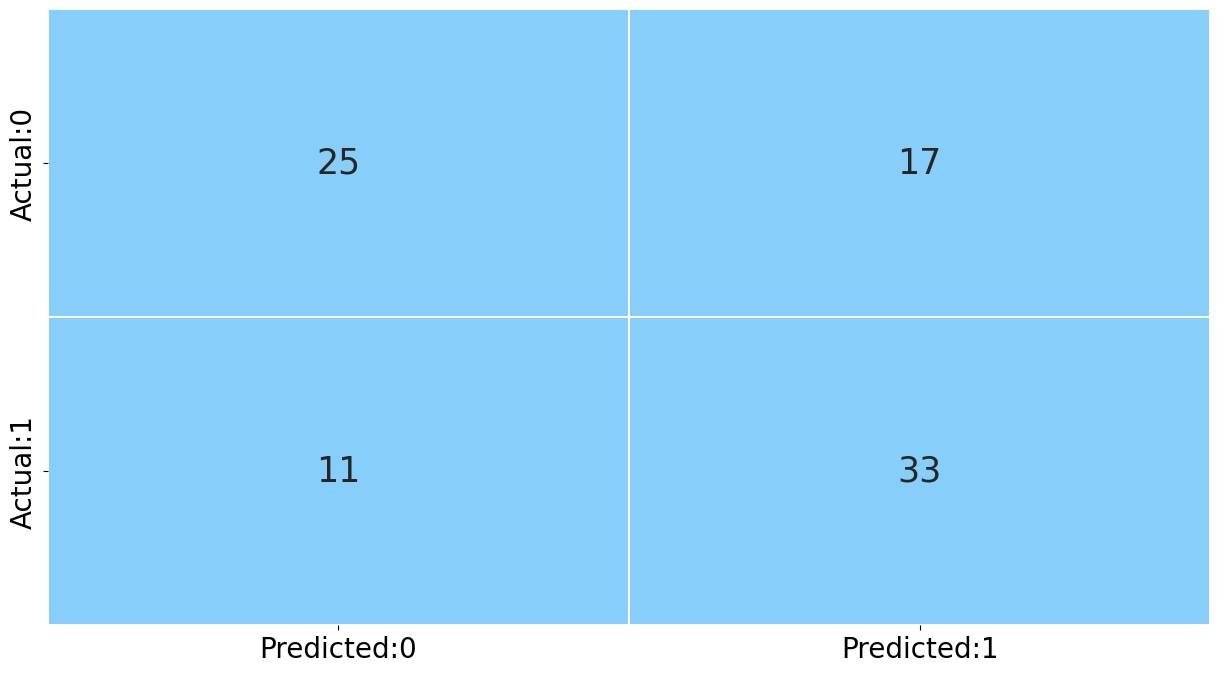

In [93]:
plot_confusion_matrix(dt_grid_model)

In [94]:
test_report = get_test_report(dt_grid_model)

# print the performace measures
print(test_report)

              precision    recall  f1-score   support

           0       0.69      0.60      0.64        42
           1       0.66      0.75      0.70        44

    accuracy                           0.67        86
   macro avg       0.68      0.67      0.67        86
weighted avg       0.68      0.67      0.67        86



In [96]:
kappa_value = kappa_score(dt_grid_model)

# print the kappa value
print(kappa_value)

0.34636264929424543


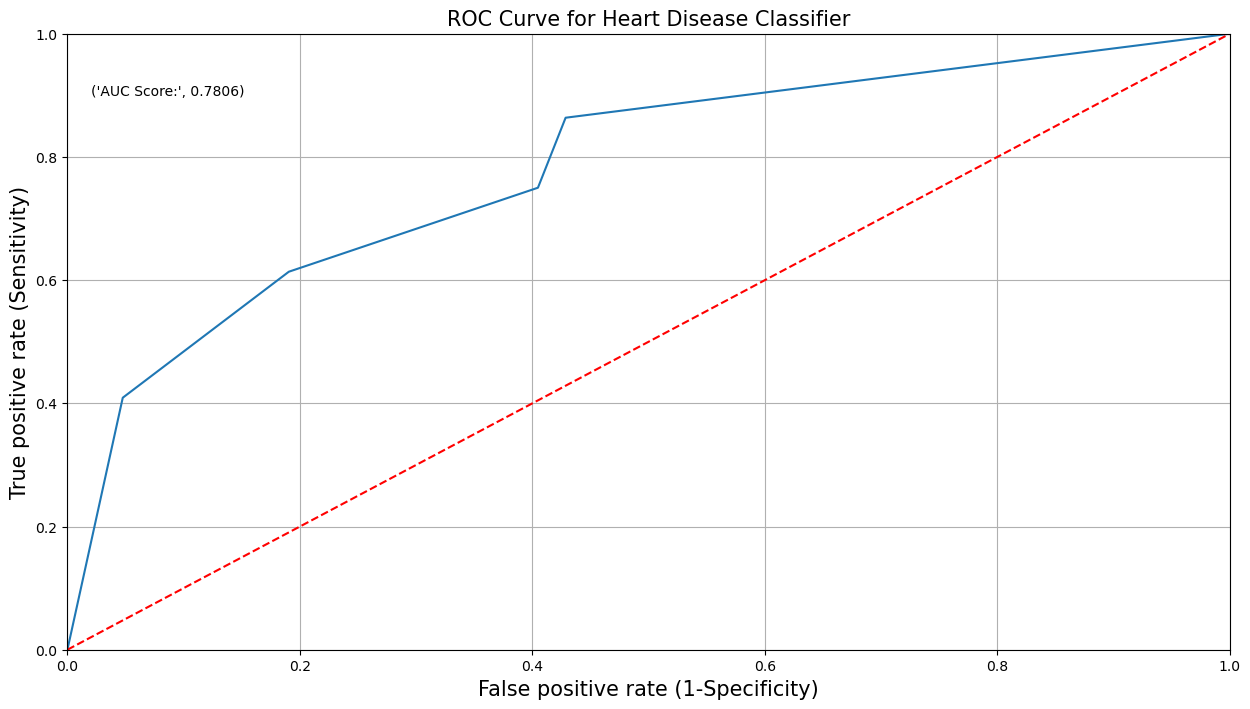

In [97]:
plot_roc(dt_grid_model)

In [98]:
update_score_card(model_name = 'Decision Tree (GridSearchCV)')

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Decision Tree,0.710498,0.743590,0.659091,0.709302,0.419860,0.698795
1,Decision Tree (Pruned),0.738907,0.738095,0.704545,0.720930,0.442162,0.720930
2,Decision Tree (GridSearchCV),0.780574,0.660000,0.750000,0.674419,0.346363,0.702128


The above table shows that the Decision Tree (GridSearchCV) has the highest values for most of the performance measures like AUC Score, Recall, f1-score, accuracy. Therefore, it can be concluded that the Decision Tree (GridSearchCV) can be used to predict the existence of heart disease in the patients. In future when we have more observations or bigger dataset and we can also apply ensemble techniques for prediction that can be tested again.